In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load data from the "EFG FO" and "Ticker info" sheets

In [3]:
file_name = 'raw_data/EFG FO Data.xlsx'

# Load data from the "EFG FO" and "Ticker info" sheets.
df_efo = pd.read_excel(file_name, sheet_name = 0)
df_ticker_info = pd.read_excel(file_name, sheet_name = 1)

In [4]:
df_efo

,Date,Ticker,FO WTD,FO MTD,FO YTD,Foreign Headroom,FO%
0,2024-01-02,ADNOCGAS UH,8.425772e+00,8.425772e+00,8.425772e+00,97.7331,2.0037
1,2024-01-02,DSI UH,0.000000e+00,0.000000e+00,0.000000e+00,27.0500,8.3600
2,2024-01-02,UPP UH,4.764544e-11,4.764544e-11,4.764544e-11,29.6900,4.3600
3,2024-01-02,WAHA UH,-4.738458e-03,-4.738458e-03,-4.738458e-03,42.5893,4.5679
4,2024-01-02,RAKBANK UH,-3.313423e-02,-3.313423e-02,-3.313423e-02,25.5851,1.3659
...,...,...,...,...,...,...,...
33815,2024-10-07,SPM AB,-8.193077e-01,-1.468281e+00,-1.821806e+00,45.3200,3.6800
33816,2024-10-07,NADEC AB,-6.456229e-01,-1.088718e+00,-4.552456e+01,42.6400,6.3600
33817,2024-10-07,MEDGULF AB,-6.498437e-01,-1.047131e+00,1.635429e+01,41.9000,7.1000
33818,2024-10-07,GIG AB,8.208959e-02,-4.167620e-02,-1.246699e+01,45.7400,3.2600


In [5]:
df_ticker_info

,Ticker,Country,Sector,EXCHANGE
0,ALPHADHA UH,UAE,Industrials,Abu Dhabi
1,ALMARAI AB,SAUDI ARABIA,Consumer Staples,Saudi Arabia
2,ALINMA AB,SAUDI ARABIA,Banking,Saudi Arabia
3,MIS AB,SAUDI ARABIA,Information Technology,Saudi Arabia
4,ALBI AB,SAUDI ARABIA,Banking,Saudi Arabia
...,...,...,...,...
283,ADNOCGAS UH,UAE,Energy,Abu Dhabi
284,PUREHEAL UH,UAE,Health Care,Abu Dhabi
285,PARKIN UH,UAE,Industrials,DFM
286,ADNOCLS UH,UAE,Energy,Abu Dhabi


## Inspect dfs

In [6]:
# Taking 5 samples
df_efo.sample(5)

,Date,Ticker,FO WTD,FO MTD,FO YTD,Foreign Headroom,FO%
6119,2024-02-07,MEPC AB,9.169958e-01,2.463777e+00,7.401977,44.4700,4.5300
12518,2024-03-19,ASLAK AB,1.658181e+00,2.947914e+00,3.102371,44.9800,4.0200
28619,2024-08-28,AMANAT UH,-3.192220e-01,2.287180e-01,8.126366,75.4600,24.0700
25364,2024-08-01,ATTMCO AB,2.741440e-01,9.078390e-02,1.465387,43.4300,5.5700
5297,2024-02-01,RAKBANK UH,-5.447770e-15,-5.078068e-15,0.011877,25.5836,1.3674


281 unique values of `Ticker` column in df_efo

In [7]:
df_efo['Ticker'].nunique()

281

In [8]:
df_efo['Ticker'].value_counts()

Ticker
ADNOCGAS UH    124
ALRAJHI AB     124
DERAYAHR AB    124
TADAWULG AB    124
WALAA AB       124
              ... 
ALMUTAHE KK     38
SMASCO AB       32
AZNOULA KK      24
MODON UH        16
NMDCENR UH      11
Name: count, Length: 281, dtype: int64

In [9]:
df_efo['Date'].value_counts()

Date
2024-09-29    277
2024-09-26    277
2024-09-25    277
2024-09-24    277
2024-09-23    277
             ... 
2024-03-11    269
2024-03-10    269
2024-03-07    269
2024-03-06    269
2024-03-19    269
Name: count, Length: 124, dtype: int64

281 unique values of `Ticker` column in df_ticker_info

In [10]:
df_ticker_info['Ticker'].nunique()

288

In [11]:
# Taking 5 samples
df_ticker_info.sample(5)

,Ticker,Country,Sector,EXCHANGE
277,DXBE UH,UAE,Consumer Discretionary,DFM
283,ADNOCGAS UH,UAE,Energy,Abu Dhabi
157,ALARKAN AB,SAUDI ARABIA,Real Estate,Saudi Arabia
77,ALQURAIN KK,KUWAIT,Consumer Staples,Kuwait
228,DEWA UH,UAE,Utilities,DFM


In [12]:
df_ticker_info['Country'].value_counts()

Country
SAUDI ARABIA    155
UAE              64
QATAR            39
KUWAIT           30
Name: count, dtype: int64

In [13]:
df_ticker_info['Sector'].value_counts()

Sector
Industrials                        45
Materials                          42
Banking                            41
Real Estate                        30
Consumer Discretionary             26
Consumer Staples                   22
Financial Services                 15
Insurance                          13
Energy                             13
Communication Services             12
Health Care                        12
Utilities                          11
Information Technology              5
Consumer Discretionary Services     1
Name: count, dtype: int64

In [14]:
df_ticker_info['EXCHANGE'].value_counts()

EXCHANGE
Saudi Arabia    155
Qatar            39
Abu Dhabi        36
Kuwait           30
DFM              28
Name: count, dtype: int64

In [15]:
df_efo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33820 entries, 0 to 33819
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              33820 non-null  datetime64[ns]
 1   Ticker            33820 non-null  object        
 2   FO WTD            33820 non-null  float64       
 3   FO MTD            33792 non-null  float64       
 4   FO YTD            33820 non-null  float64       
 5   Foreign Headroom  33820 non-null  float64       
 6   FO%               33820 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 1.8+ MB


#### `FO MTD` column has 28 null values

In [16]:
df_efo[df_efo['FO MTD'].isna()].head(5)

,Date,Ticker,FO WTD,FO MTD,FO YTD,Foreign Headroom,FO%
319,2024-01-03,JAZEERA KK,0.000000,NaN,0.000000,83.50,16.50
321,2024-01-03,MABANEE KK,-0.356200,NaN,-0.356200,84.15,15.85
349,2024-01-03,INTEGRAT KK,0.041952,NaN,0.041952,84.81,15.19
356,2024-01-03,WARBABAN KK,0.000000,NaN,0.000000,94.49,5.51
357,2024-01-03,ALIMTIAZ KK,-0.019628,NaN,-0.019628,95.84,4.16


- We can replace the nan values with the mean of the remaining 33792 values
- Or replace the nan values with the mean of only that day
- But lets drop those rows for now, hence they are only 28 values which represents only 0.082%

In [17]:
df_efo = df_efo[~df_efo['FO MTD'].isna()]
df_efo.info()


<class 'pandas.core.frame.DataFrame'>
Index: 33792 entries, 0 to 33819
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              33792 non-null  datetime64[ns]
 1   Ticker            33792 non-null  object        
 2   FO WTD            33792 non-null  float64       
 3   FO MTD            33792 non-null  float64       
 4   FO YTD            33792 non-null  float64       
 5   Foreign Headroom  33792 non-null  float64       
 6   FO%               33792 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 2.1+ MB


In [18]:
df_efo['Ticker'].nunique()

281

In [19]:
df_ticker_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Ticker    288 non-null    object
 1   Country   288 non-null    object
 2   Sector    288 non-null    object
 3   EXCHANGE  288 non-null    object
dtypes: object(4)
memory usage: 9.1+ KB


In [20]:
df_efo.describe()

,Date,FO WTD,FO MTD,FO YTD,Foreign Headroom,FO%
count,33792,33792.000000,3.379200e+04,33792.000000,33792.000000,33792.000000
mean,2024-05-11 01:21:51.647727360,0.646435,2.445621e+00,16.981644,50.726312,9.267188
min,2024-01-02 00:00:00,-530.078761,-5.339566e+02,-461.128525,-3.410000,0.000000
25%,2024-02-26 00:00:00,-0.596962,-1.288028e+00,-4.281352,38.640000,4.090000
50%,2024-05-07 00:00:00,0.000000,1.013679e-15,0.692450,43.460000,6.950000
75%,2024-08-01 00:00:00,0.591374,1.610163e+00,9.836010,48.440000,11.610000
max,2024-10-07 00:00:00,4715.709022,4.751768e+03,4944.882900,99.940000,79.982200
std,NaN,44.577025,7.242057e+01,174.432982,21.661385,9.478095


In [21]:
df_ticker_info.describe()

,Ticker,Country,Sector,EXCHANGE
count,288,288,288,288
unique,288,4,14,5
top,ALPHADHA UH,SAUDI ARABIA,Industrials,Saudi Arabia
freq,1,155,45,155


#### 281 unique values of `Ticker` column in df_efo while 288 values exists in df_ticker_info
This is the column on which the join will happen

In [22]:
df_ticker_info['Ticker'].nunique(), df_efo['Ticker'].nunique()

(288, 281)

There are 16 tickers that exists in df_ticker_info and not in df_efo

In [23]:
df_ticker_info_ticker_arr = df_ticker_info['Ticker'].unique()
df_efo_ticker_arr = df_efo['Ticker'].unique()

diff = np.setdiff1d(df_ticker_info_ticker_arr, df_efo_ticker_arr)
diff, diff.size

(array(['ALHOKAIR AB', 'ALKHODAR AB', 'ALMRAKEZ AB', 'ALQURAIN KK',
        'ARTC UH', 'AUB KK', 'AXA AB', 'DAMAC UH', 'DUR AB', 'DXBE UH',
        'EMAARMLS UH', 'ETISALAT UH', 'NCB AB', 'PETROCH AB', 'SAMBA AB',
        'SRE AB'], dtype=object),
 16)

In [24]:
df_ticker_info[df_ticker_info['Ticker'].isin(list(diff))]

,Ticker,Country,Sector,EXCHANGE
77,ALQURAIN KK,KUWAIT,Consumer Staples,Kuwait
84,AUB KK,KUWAIT,Banking,Kuwait
116,ARTC UH,UAE,Industrials,Abu Dhabi
160,ETISALAT UH,UAE,Communication Services,Abu Dhabi
166,DAMAC UH,UAE,Real Estate,DFM
173,DUR AB,SAUDI ARABIA,Consumer Discretionary,Saudi Arabia
187,ALHOKAIR AB,SAUDI ARABIA,Consumer Discretionary,Saudi Arabia
188,PETROCH AB,SAUDI ARABIA,Materials,Saudi Arabia
194,AXA AB,SAUDI ARABIA,Insurance,Saudi Arabia
211,ALMRAKEZ AB,SAUDI ARABIA,Real Estate,Saudi Arabia


In [25]:
df_efo[df_efo['Ticker'].isin(list(diff))]

,Date,Ticker,FO WTD,FO MTD,FO YTD,Foreign Headroom,FO%


There are 9 tickers that exists in df_efo and not in df_ticker_info

In [26]:
diff = np.setdiff1d(df_efo_ticker_arr, df_ticker_info_ticker_arr)
diff, diff.size

(array(['AGILITY UH', 'AVALONPH AB', 'EAT AB', 'MODON UH', 'NMDCENR UH',
        'SAL AB', 'SMASCO AB', 'SPINNEYS UH', 'SPM AB'], dtype=object),
 9)

In [27]:
df_efo[df_efo['Ticker'].isin(list(diff))]

,Date,Ticker,FO WTD,FO MTD,FO YTD,Foreign Headroom,FO%
17075,2024-05-08,AGILITY UH,-19.741668,-43.254086,-43.254086,51.4686,15.4538
17452,2024-05-09,AGILITY UH,-25.423761,-48.750846,-48.750846,51.4877,15.2995
17620,2024-05-12,AGILITY UH,-29.018964,-51.812077,-51.812077,51.5275,15.1929
17993,2024-05-13,AGILITY UH,-1.949558,-53.901054,-53.901054,51.5253,15.1392
18165,2024-05-16,AGILITY UH,-10.837825,-62.130164,-62.130164,51.6036,14.8932
...,...,...,...,...,...,...,...
33706,2024-10-07,AGILITY UH,-1.412987,-2.675910,-252.713952,51.7530,9.1997
33718,2024-10-07,MODON UH,5.387683,-524.461674,-271.860372,27.3923,2.1862
33719,2024-10-07,NMDCENR UH,3.013885,65.726532,100.247603,91.4166,7.5929
33797,2024-10-07,EAT AB,-1.627273,-4.389791,25.224555,40.6700,8.3300


Those 9 unique tickers results in 392 records, which make up about 1.1%

In [28]:
df_ticker_info[df_ticker_info['Ticker'].isin(list(diff))]

,Ticker,Country,Sector,EXCHANGE


## Merge the two sheets on the "Ticker" column to create a single Data Frame

33808 rows = 33792 rows in df_efo + 16 which are in df_ticker_info and not in df_efo

In [29]:
df_merged = df_efo.merge(df_ticker_info, on='Ticker', how='outer')
df_merged

,Date,Ticker,FO WTD,FO MTD,FO YTD,Foreign Headroom,FO%,Country,Sector,EXCHANGE
0,2024-01-02,ADNOCGAS UH,8.425772,8.425772,8.425772,97.7331,2.0037,UAE,Energy,Abu Dhabi
1,2024-01-03,ADNOCGAS UH,11.853966,11.853966,11.853966,97.7322,2.0090,UAE,Energy,Abu Dhabi
2,2024-01-04,ADNOCGAS UH,18.079903,18.079903,18.079903,97.7375,2.0184,UAE,Energy,Abu Dhabi
3,2024-01-08,ADNOCGAS UH,5.377009,23.548336,23.548336,97.7378,2.0269,UAE,Energy,Abu Dhabi
4,2024-01-09,ADNOCGAS UH,6.102280,24.231201,24.231201,97.7393,2.0280,UAE,Energy,Abu Dhabi
...,...,...,...,...,...,...,...,...,...,...
33803,NaT,NCB AB,NaN,NaN,NaN,NaN,NaN,SAUDI ARABIA,Banking,Saudi Arabia
33804,NaT,SAMBA AB,NaN,NaN,NaN,NaN,NaN,SAUDI ARABIA,Banking,Saudi Arabia
33805,NaT,ALKHODAR AB,NaN,NaN,NaN,NaN,NaN,SAUDI ARABIA,Industrials,Saudi Arabia
33806,NaT,EMAARMLS UH,NaN,NaN,NaN,NaN,NaN,UAE,Real Estate,DFM


408 Nan rows = 392 rows resulted from tickers that are in df_efo only + 16 rows resulted from tickers that are in only

In [30]:
# Drop NaN values
df_merged = df_merged[~df_merged.isna().any(axis=1)]
df_merged

,Date,Ticker,FO WTD,FO MTD,FO YTD,Foreign Headroom,FO%,Country,Sector,EXCHANGE
0,2024-01-02,ADNOCGAS UH,8.425772,8.425772,8.425772,97.7331,2.0037,UAE,Energy,Abu Dhabi
1,2024-01-03,ADNOCGAS UH,11.853966,11.853966,11.853966,97.7322,2.0090,UAE,Energy,Abu Dhabi
2,2024-01-04,ADNOCGAS UH,18.079903,18.079903,18.079903,97.7375,2.0184,UAE,Energy,Abu Dhabi
3,2024-01-08,ADNOCGAS UH,5.377009,23.548336,23.548336,97.7378,2.0269,UAE,Energy,Abu Dhabi
4,2024-01-09,ADNOCGAS UH,6.102280,24.231201,24.231201,97.7393,2.0280,UAE,Energy,Abu Dhabi
...,...,...,...,...,...,...,...,...,...,...
33395,2024-09-29,PARKIN UH,-0.305315,11.921287,-24.857719,92.3600,7.2400,UAE,Industrials,DFM
33396,2024-10-02,PARKIN UH,0.311010,0.311899,-24.709927,92.3500,7.2500,UAE,Industrials,DFM
33397,2024-10-03,PARKIN UH,0.624717,0.626955,-24.513412,92.3400,7.2600,UAE,Industrials,DFM
33398,2024-10-06,PARKIN UH,0.942039,0.944958,-24.365812,92.3400,7.2700,UAE,Industrials,DFM


### Provide a summary or snapshot (e.g., FO% changes by ticker, sector and country) to give users an overview of the data

Filter by `ADNOCGAS UH` in Ticker, `Energy` in Sector and `UAE` in Country

In [31]:
df_filtered = df_merged[(df_merged['Ticker'] == 'ADNOCGAS UH') & (df_merged['Sector'] == 'Energy') & (df_merged['Country'] == 'UAE')]
df_filtered

,Date,Ticker,FO WTD,FO MTD,FO YTD,Foreign Headroom,FO%,Country,Sector,EXCHANGE
0,2024-01-02,ADNOCGAS UH,8.425772,8.425772,8.425772,97.7331,2.0037,UAE,Energy,Abu Dhabi
1,2024-01-03,ADNOCGAS UH,11.853966,11.853966,11.853966,97.7322,2.0090,UAE,Energy,Abu Dhabi
2,2024-01-04,ADNOCGAS UH,18.079903,18.079903,18.079903,97.7375,2.0184,UAE,Energy,Abu Dhabi
3,2024-01-08,ADNOCGAS UH,5.377009,23.548336,23.548336,97.7378,2.0269,UAE,Energy,Abu Dhabi
4,2024-01-09,ADNOCGAS UH,6.102280,24.231201,24.231201,97.7393,2.0280,UAE,Energy,Abu Dhabi
...,...,...,...,...,...,...,...,...,...,...
119,2024-09-29,ADNOCGAS UH,0.660769,-6.319648,-21.591167,97.7744,1.9576,UAE,Energy,Abu Dhabi
120,2024-10-02,ADNOCGAS UH,-6.473927,1.779172,-27.950898,97.7847,1.9478,UAE,Energy,Abu Dhabi
121,2024-10-03,ADNOCGAS UH,-5.665025,2.562133,-27.174105,97.7838,1.9490,UAE,Energy,Abu Dhabi
122,2024-10-06,ADNOCGAS UH,-3.556049,4.668925,-25.102660,97.7808,1.9522,UAE,Energy,Abu Dhabi


[Text(0.5, 1.0, 'ADNOCGAS UH Ticker, Energy Sector and UAE Country')]

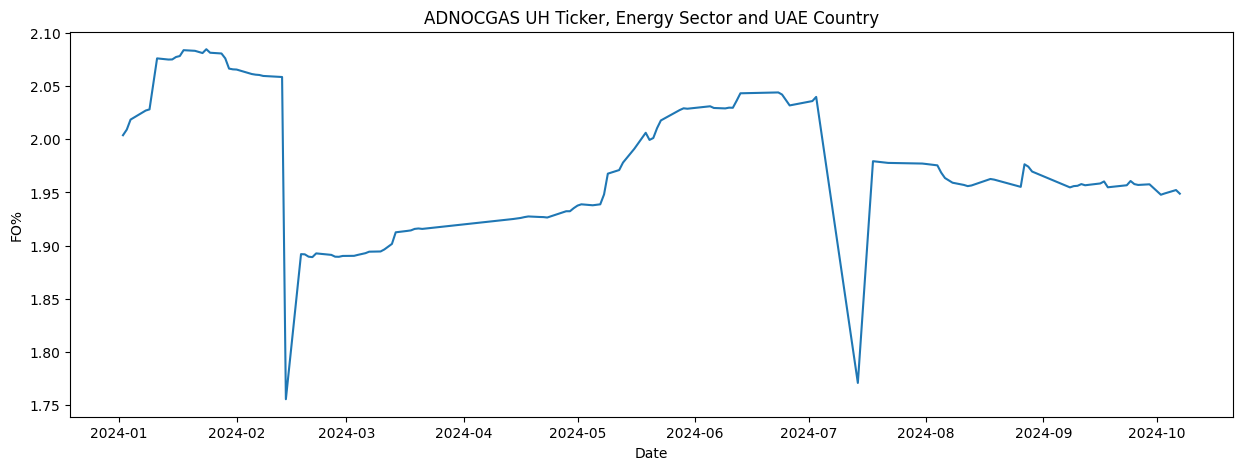

In [32]:
fig = plt.subplots(figsize=(15, 5))
sns.lineplot(data=df_filtered, x="Date", y="FO%").set(title='ADNOCGAS UH Ticker, Energy Sector and UAE Country') 